In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras.backend as K

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam ,RMSprop

In [3]:
train = pd.read_csv("C:/Users/tika-btm-ltp27/Downloads/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test= pd.read_csv("C:/Users/tika-btm-ltp27/Downloads/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
X_train.dtype

dtype('float32')

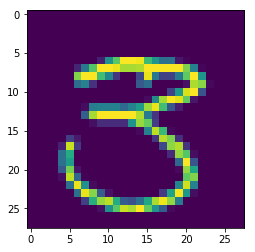

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
plt.imshow(X_train[7])

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape
X_train.shape

(42000, 28, 28, 1)

In [11]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

C:\Users\tika-btm-ltp27\Anaconda2\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


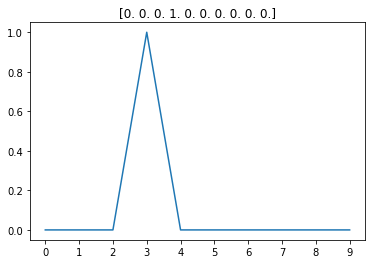

In [12]:
plt.title(y_train[7])
plt.plot(y_train[7])
plt.xticks(range(10));

In [13]:
seed = 43
np.random.seed(seed)

In [14]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Lambda , Dense, Flatten

In [15]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [16]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [17]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model

In [19]:
from tensorflow.keras.preprocessing import image
gen = image.ImageDataGenerator()

In [20]:
gen

In [21]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
37800/37800 [==============================] - 171s 5ms/step - loss: 0.2403 - acc: 0.9342 - val_loss: 0.3263 - val_acc: 0.9162
Epoch 2/3
37800/37800 [==============================] - 203s 5ms/step - loss: 0.2157 - acc: 0.9418 - val_loss: 0.3508 - val_acc: 0.9067
Epoch 3/3
37800/37800 [==============================] - 197s 5ms/step - loss: 0.2098 - acc: 0.9436 - val_loss: 0.3676 - val_acc: 0.9064


In [23]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [24]:
fc = get_fc_model()
fc.optimizer.lr=0.01
history=fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 838s 22ms/step - loss: 0.1570 - acc: 0.9734 - val_loss: 0.5436 - val_acc: 0.9579


In [25]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

https://keras.io/getting-started/sequential-model-guide/

In [26]:

model= get_cnn_model()
model.optimizer.lr=0.01

In [27]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
 7955/37800 [=====>........................] - ETA: 3:25:50 - loss: 0.0821 - acc: 0.9766

KeyboardInterrupt: 

In [28]:
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X, y, batch_size=64)

In [29]:
predictions = model.predict_classes(X_test, verbose=0)
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})


In [30]:
submissions.to_csv("DR.csv", index=False, header=True)